# Part 1: Project Setup



## 1.1 Import Packages and Mount to Google Drive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Mount to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.2 Load Dataset & Perform Train/Test Split



In [ ]:
# Load data
data = pd.read_csv('/content/drive/My Drive/full_data.csv')

In [ ]:
# Only use 50K rows (10% of data) for training set
train_data, test_data = train_test_split(data, test_size = 0.9, random_state=42)

In [ ]:
# Verify that train_data has 50K rows
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 234816 to 121958
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   trustLevel                 50000 non-null  int64  
 1   totalScanTimeInSeconds     50000 non-null  int64  
 2   grandTotal                 50000 non-null  float64
 3   lineItemVoids              50000 non-null  int64  
 4   scansWithoutRegistration   50000 non-null  int64  
 5   quantityModifications      50000 non-null  int64  
 6   scannedLineItemsPerSecond  50000 non-null  float64
 7   valuePerSecond             50000 non-null  float64
 8   lineItemVoidsPerPosition   50000 non-null  float64
 9   fraud                      50000 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 4.2 MB


# Part 2: Exploratory Data Analysis (EDA) on Training Data:



## 2.1 Data Structure

In [ ]:
train_data.head(5)

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
234816,3,144,21.70,5,2,1,0.118056,0.150694,0.294118,0
113195,6,867,56.53,0,5,2,0.008074,0.065202,0.000000,0
95363,2,266,26.70,8,0,4,0.071429,0.100376,0.421053,0
312860,6,647,4.29,2,9,5,0.003091,0.006631,1.000000,0
181271,5,280,45.01,10,5,3,0.021429,0.160750,1.666667,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 234816 to 121958
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   trustLevel                 50000 non-null  int64  
 1   totalScanTimeInSeconds     50000 non-null  int64  
 2   grandTotal                 50000 non-null  float64
 3   lineItemVoids              50000 non-null  int64  
 4   scansWithoutRegistration   50000 non-null  int64  
 5   quantityModifications      50000 non-null  int64  
 6   scannedLineItemsPerSecond  50000 non-null  float64
 7   valuePerSecond             50000 non-null  float64
 8   lineItemVoidsPerPosition   50000 non-null  float64
 9   fraud                      50000 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 4.2 MB


All variables have correct type of either integer or float, and there are no null values. There are also 50,000 observations in the training set, as expected. We are good to proceed with the rest of our exploratory data analysis!

## 2.2 Summary Statistics


In [ ]:
train_data.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000
mean,3.509640,913.706220,50.046419,5.458020,4.991360,2.50532,0.068475,0.223341,0.730405,0.046640
std,1.705041,531.574743,28.789013,3.459618,3.165521,1.71164,0.511205,1.744594,1.307856,0.210869
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000546,0.000000,0.000000,0.000000
25%,2.000000,451.000000,25.190000,2.000000,2.000000,1.00000,0.008653,0.027578,0.157895,0.000000
50%,4.000000,912.000000,49.980000,5.000000,5.000000,3.00000,0.016918,0.054755,0.350000,0.000000
75%,5.000000,1377.000000,75.042500,8.000000,8.000000,4.00000,0.034483,0.110261,0.687500,0.000000
max,6.000000,1831.000000,99.990000,11.000000,10.000000,5.00000,30.000000,98.260000,11.000000,1.000000


It is important to note that there is a signficant class imbalance for the target variable of fraud in our dataset. Less than 5% of our observations are classified as 'fraud' (fraud = 1). This class imbalance can pose a serious challenge for model training, leading to biased predictions towards the majority class of 'not fraud' (fraud = 0).

Optimizing for a higher recall is crucial in this context, since false negatives (failure to identify fraud) could lead to detrimental losses for businesses. Conversely, false negatives can be less of an issue since the customer can fact-check their receipts to prove their innocence.





## 2.3 Correlation Matrix



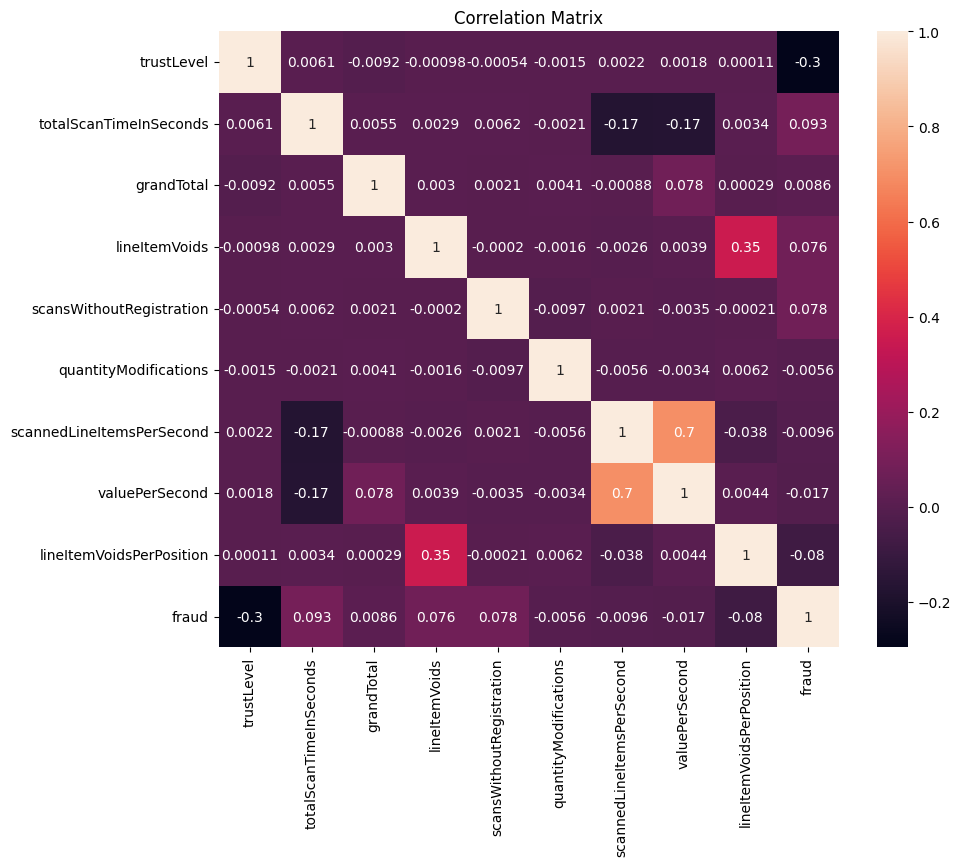

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot = True)
plt.title("Correlation Matrix")
plt.show()



1.   valuePerSecond and scannedLineItemsPerSecond have a strong positive correlation of 0.7. This makes intuitive sense since the more items a person is scanning per second should lead to the value being higher. It may be worthwile to omit one of these variables during training to avoid multicollinearity in our model.
2.   Interestingly, the only variable that fraud has any significant correlation with is trustLevel with -0.3, meaning that the lower a person's trust score, the higher the likelihood of fraud. It would be intriguing to see how strong of an effect trustLevel has in our models and what happens if it is omitted from training.



## 2.4 Bar Plot of Fraud Rate vs. Trust Level

Let's further evaluate the relationship between a person's trustLevel and target variable fraud by plotting the percentage of fraudulent checkouts for each trust level:

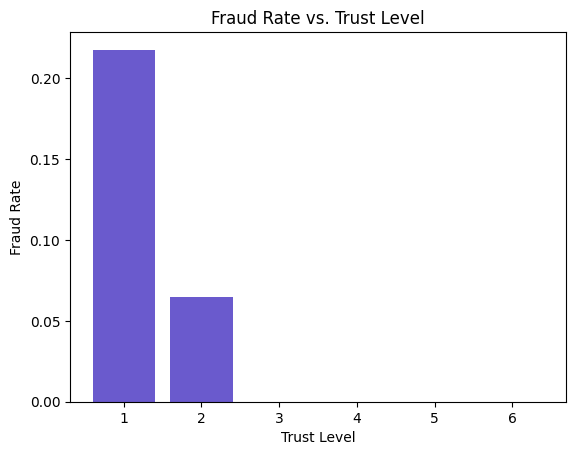

In [ ]:
# Group by trustLevel, then calculate the fraud rate
fraud_rate_by_trust = train_data.groupby('trustLevel')['fraud'].mean()

# Create empty figure
fig, ax = plt.subplots()

# Plot bar chart
ax.bar(fraud_rate_by_trust.index, fraud_rate_by_trust.values, color = 'slateblue')

# Set title and axis labels
ax.set_title('Fraud Rate vs. Trust Level')
ax.set_xlabel('Trust Level')
ax.set_ylabel('Fraud Rate')

# Display bar chart
plt.show()


In [ ]:
fraud_rate_by_trust

,fraud
trustLevel,
1,0.217523
2,0.064933
3,0.000000
4,0.000000
5,0.000000
6,0.000000


From this plot, we discovered that there is a fraud_rate of 21.75% for trustLevel = 1 and 6.49% for trustLevel = 2. However, there are no fraudulent cases for individuals with trust scores greater than 2 in our dataset (3-6).Since trustLevel is calculated from some unknown function/model, it begs the question what factors were included in predicting a customer's trustLevel. This finding furthers the notion that we should take a closer look at the impact of trustLevel in our modeling phase.

## 2.5 Probability Distributions of Total Scan Time

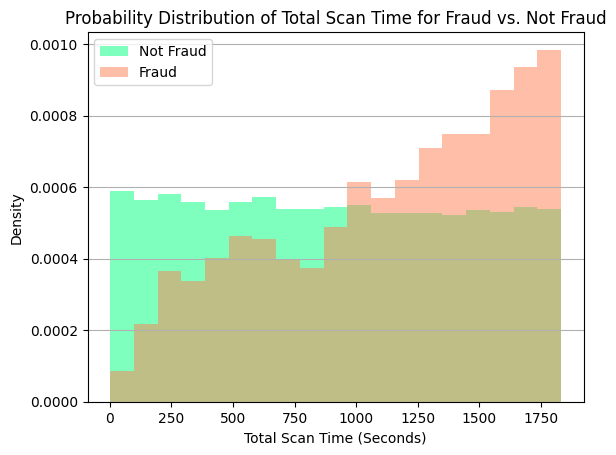

In [ ]:
# Create two new dfs of Total Scan Times for fraudulent and non-fradulent checkouts
non_fraud_total_scan_time = train_data[train_data['fraud'] == 0]['totalScanTimeInSeconds']
fraud_total_scan_time = train_data[train_data['fraud'] == 1]['totalScanTimeInSeconds']

# Create bins for distributions
bins = np.linspace(train_data['totalScanTimeInSeconds'].min(), train_data['totalScanTimeInSeconds'].max(), 20)

# Create empty figure
fig, ax = plt.subplots()

# Plot probability distributions of Total Scan Time for each class
ax.hist(non_fraud_total_scan_time, bins = bins, alpha = 0.5, color = 'springgreen', density = True, label = 'Not Fraud')
ax.hist(fraud_total_scan_time, bins = bins, alpha = 0.5, color = 'coral', density = True, label = 'Fraud')

# Set title and axis labels
ax.set_title('Probability Distribution of Total Scan Time for Fraud vs. Not Fraud')
ax.set_xlabel('Total Scan Time (Seconds)')
ax.set_ylabel('Density')

# Add legend
ax.legend()

# Add y-axis grid lines
ax.grid(axis = 'y')

# Display the plot
plt.show()

From our probability distributions, we observe that non-fraudulent checkouts are relatively constant in their total scan times. This finding can be rationalized by the fact that regular (non-fraudulent) shoppers can purchase various amounts of goods during any given shopping trip. This reinforces the idea that total scan time should not have any noticeable trend for non-fraudulent shoppers.

However, the likelihood of fraudulent checkouts tends to increase with longer total scan times. This finding indicates that fraudulent shoppers may take a longer time to scan items. One possible explanation could be that these shoppers take more time in an effort to hide skipped items while scanning. We can deduce that longer total scan times can be used as a useful indicator in classifying future fraudulent checkouts.

## 2.6 Box Plots of Scans Without Registration


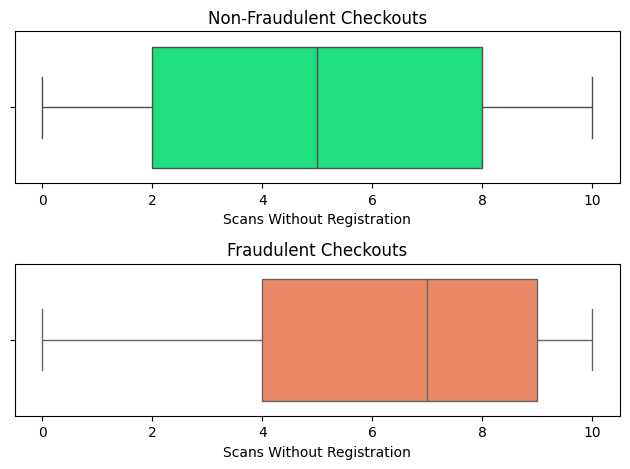

In [ ]:
# Create two new dfs for fraudulent and non-fraudulent checkouts
non_fraud_checkouts = train_data[train_data['fraud'] == 0]
fraud_checkouts = train_data[train_data['fraud'] == 1]

# Create an empty figure
plt.figure()

# Box plot for scans without registration for non-fraudulent checkouts
plt.subplot(2, 1, 1)
sns.boxplot(x = 'scansWithoutRegistration', data = non_fraud_checkouts, color = 'springgreen')
plt.title('Non-Fraudulent Checkouts')
plt.xlabel('Scans Without Registration')

# Box plot for scans without registration for fraudulent checkouts
plt.subplot(2, 1, 2)
sns.boxplot(x = 'scansWithoutRegistration', data = fraud_checkouts, color = 'coral')
plt.title('Fraudulent Checkouts')
plt.xlabel('Scans Without Registration')

# Display the plots
plt.tight_layout()
plt.show()

From our box plots, we gain some insight into the relationship between scans without registration and our target variable of fraud. For non-fraudulent checkouts, we observe the median value for scans without registrations to be 5 with an interquartile range [2, 8]. For fraudulent checkouts, we observe the median value for scans without registrations to be 7 with an interquartile range [4, 9].

Thus, our findings suggest that fraudulent shoppers tend to attempt to scan more items without actually scanning the barcode. This intuitively makes sense since fraudulent shoppers may attempt to fool the self-checkout cameras by appearing to scan an item's barcode without actually registering it in the system and being charged for it.

# Part 3: Modeling Results

In [ ]:
y_train = train_data['fraud']
y_test = test_data['fraud']

# Perform OHE
X_train = pd.get_dummies(train_data.drop(columns=['fraud']), drop_first=True)
X_test = pd.get_dummies(test_data.drop(columns=['fraud']), drop_first=True)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3.1 Baseline Model

In [ ]:
# Logistic regression model
lr_baseline = LogisticRegression(max_iter=1000, random_state=42)
lr_baseline.fit(X_train, y_train)

# Predict
threshold = 0.2
y_pred_prob_lr = lr_baseline.predict_proba(X_test)[:, 1]
y_pred_lr = (y_pred_prob_lr > threshold).astype(int)

In [ ]:
# Classification Report
classif_report = classification_report(y_test, y_pred_lr)
print("Classification Report:\n", classif_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98    428501
           1       0.60      0.92      0.73     21499

    accuracy                           0.97    450000
   macro avg       0.80      0.95      0.85    450000
weighted avg       0.98      0.97      0.97    450000



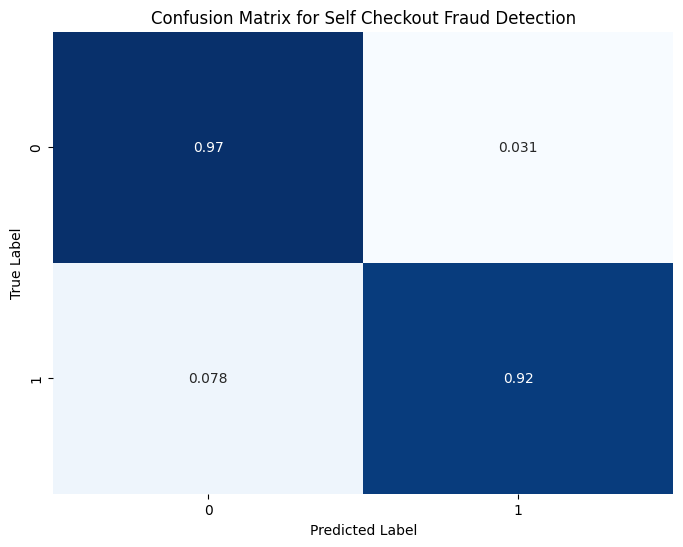

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr, normalize='true')

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', cbar=False,
            xticklabels=True, yticklabels=True)

plt.title('Confusion Matrix for Self Checkout Fraud Detection')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

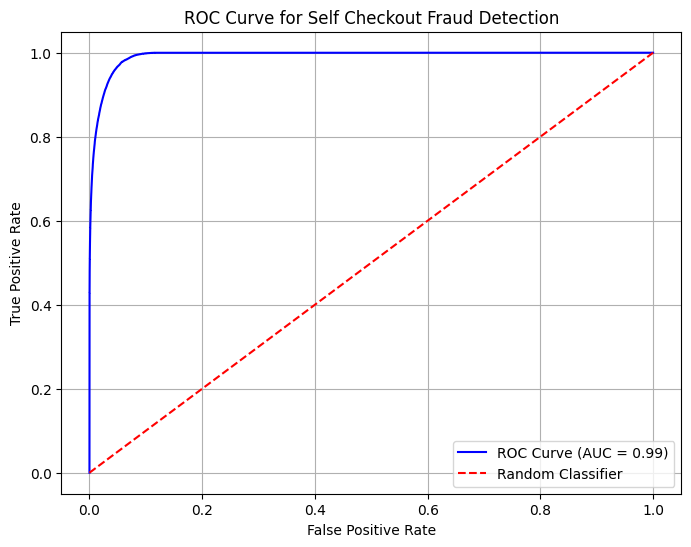

In [ ]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')

plt.title('ROC Curve for Self Checkout Fraud Detection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
# rf = RandomForestClassifier(n_jobs=-1)
# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)
# print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     76223
           1       0.97      0.95      0.96      3777

    accuracy                           1.00     80000
   macro avg       0.98      0.97      0.98     80000
weighted avg       1.00      1.00      1.00     80000



Text(0.5, 1.0, 'Feature Importance')

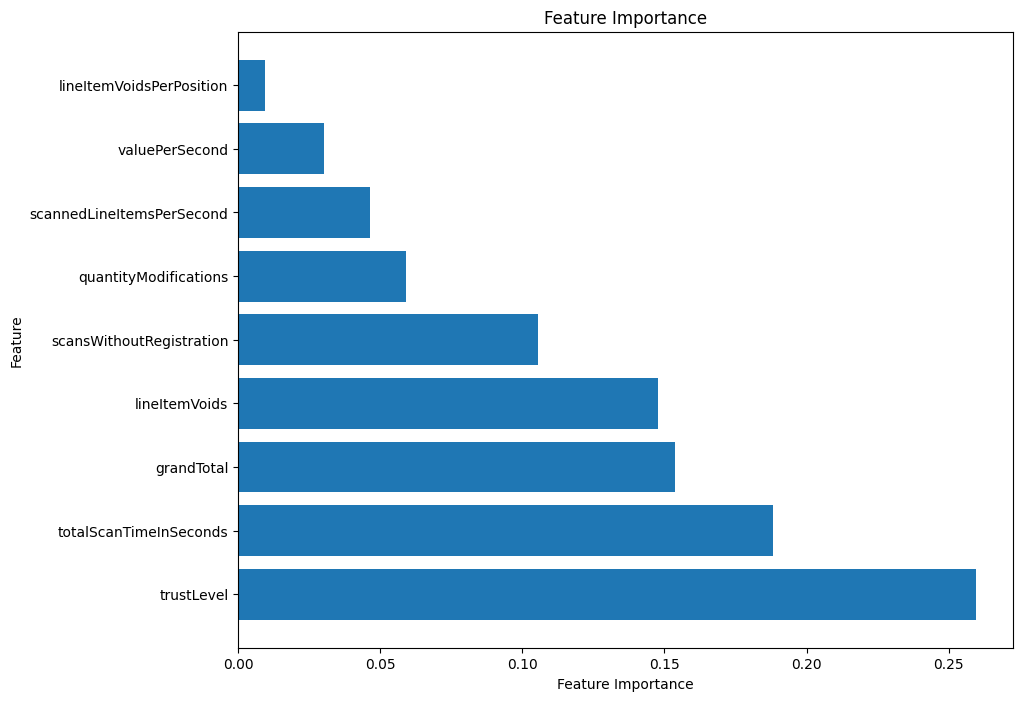

In [ ]:
# # plot feature importance
# plt.figure(figsize=(10, 8))
# importances = rf.feature_importances_
# indices = np.argsort(importances)[::-1]
# plt.barh(df.columns[:-1], importances[indices])
# plt.xlabel('Feature Importance')
# plt.ylabel('Feature')
# plt.title('Feature Importance')

In [ ]:
# holdout = pd.read_csv('data/test_data.csv')
# X = holdout.drop('fraud', axis=1)
# y = holdout['fraud']

# X = scaler.transform(X)
# y_pred = rf.predict(X)
# print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     95200
           1       0.97      0.95      0.96      4800

    accuracy                           1.00    100000
   macro avg       0.98      0.98      0.98    100000
weighted avg       1.00      1.00      1.00    100000



In [ ]:
import random

# Parameters
N = 100000     # for example, run 100,000 simulations
x = 1.0        # start with $1 for simplicity

num_trials = 10000  # number of separate experiments
final_amounts = []

for _ in range(num_trials):
    bankroll = x
    for _ in range(N):
        flip = random.random()  # generates a number between 0 and 1
        if flip < 0.5:
            # heads
            bankroll *= 1.5
        else:
            # tails
            bankroll *= 0.6
    final_amounts.append(bankroll)

# Compute the average final amount over all trials
average_final = sum(final_amounts) / num_trials
print("Average final amount after", N, "games:", average_final)

Average final amount after 100000 games: 8.53345e-319


In [ ]:
max(final_amounts)

7.492322527e-315